### 1. Load library

In [1]:
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn

from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False #숫자 마이너스 부호 깨질 때 사용
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name) # font 깨져서 설정해주기

In [2]:
import pandas as pd 
data = pd.read_excel("C:/Users/HOME/Desktop/TSB/TSB/Untitled Folder/data/KCB_RANDOM_SAMPLE_SME_P_2018(200818) (1).xlsx", encoding="utf-8")

### 2. Data Preprocessing

In [3]:
data 

,Unnamed: 0,자료 순번,연령대,B_AREA_CD_M,도시,시군구,자료추출기준일,신용평점,목적값,주거용부동산 보유여부,...,최초신용카드개설일자로부터경과일수[법인카드].1,1개월전(15일)카드일시불총이용금액[법인카드],1년내(15일)카드일시불최고총이용금액[법인카드],카드총이용잔액[법인카드],신용카드기관수[법인카드],소유 사업체 건수 (폐업제외),최초폐업일자로부터경과일수,사업자정보최초등록일자로부터경과일수,(추정) 월평균 연소득 1,사업시작월
0,0,10,30,44180,충청남도,보령시,20180630,917,0,0,...,0,0,0,0,0,1,-548,473,180,201703
1,1,490,50,41465,경기도,용인시 수지구,20180630,921,0,1,...,0,0,0,0,0,1,0,995,230,201510
2,2,970,50,41610,경기도,광주시,20180630,675,0,0,...,0,0,0,0,0,1,0,3866,220,200711
3,3,1210,50,42210,강원도,속초시,20180630,897,0,1,...,0,0,0,0,0,1,0,3866,330,200711
4,4,1450,40,41461,경기도,용인시 처인구,20180630,906,1,1,...,0,0,0,0,0,1,5594,3866,1100,200711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53922,53922,63299,50,43111,충청북도,청주시 상당구,20180630,701,0,0,...,963,0,0,0,1,1,0,960,240,201511
53923,53923,63539,50,41290,경기도,과천시,20180630,920,0,1,...,229,0,0,0,1,1,0,213,230,201711
53924,53924,63779,60,11710,서울특별시,송파구,20180630,908,0,1,...,461,3690,3750,3674,1,1,0,461,420,201703
53925,53925,64259,40,45140,전라북도,익산시,20180630,882,0,0,...,1329,212,814,293,1,1,0,3866,450,200711


In [6]:
data = data.drop(['Unnamed: 0'],axis=1) # 데이터 없는 열 삭제

In [7]:
data

,자료 순번,연령대,B_AREA_CD_M,도시,시군구,자료추출기준일,신용평점,목적값,주거용부동산 보유여부,자가거주 여부,...,최초신용카드개설일자로부터경과일수[법인카드].1,1개월전(15일)카드일시불총이용금액[법인카드],1년내(15일)카드일시불최고총이용금액[법인카드],카드총이용잔액[법인카드],신용카드기관수[법인카드],소유 사업체 건수 (폐업제외),최초폐업일자로부터경과일수,사업자정보최초등록일자로부터경과일수,(추정) 월평균 연소득 1,사업시작월
0,10,30,44180,충청남도,보령시,20180630,917,0,0,0,...,0,0,0,0,0,1,-548,473,180,201703
1,490,50,41465,경기도,용인시 수지구,20180630,921,0,1,1,...,0,0,0,0,0,1,0,995,230,201510
2,970,50,41610,경기도,광주시,20180630,675,0,0,0,...,0,0,0,0,0,1,0,3866,220,200711
3,1210,50,42210,강원도,속초시,20180630,897,0,1,1,...,0,0,0,0,0,1,0,3866,330,200711
4,1450,40,41461,경기도,용인시 처인구,20180630,906,1,1,1,...,0,0,0,0,0,1,5594,3866,1100,200711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53922,63299,50,43111,충청북도,청주시 상당구,20180630,701,0,0,0,...,963,0,0,0,1,1,0,960,240,201511
53923,63539,50,41290,경기도,과천시,20180630,920,0,1,1,...,229,0,0,0,1,1,0,213,230,201711
53924,63779,60,11710,서울특별시,송파구,20180630,908,0,1,0,...,461,3690,3750,3674,1,1,0,461,420,201703
53925,64259,40,45140,전라북도,익산시,20180630,882,0,0,0,...,1329,212,814,293,1,1,0,3866,450,200711


In [43]:
# 필요한 독립변수와 종속변수 지정
data['목적값'] = data['목적값'].replace(2,1)

data_1 = data[['주거용부동산 보유여부', '월평균상환원금금액합계', 
               '평균부담대출이자율','월평균총신용카드이용금액','DTI','DSR',
               '저축은행업종대출총잔액(미해지)[기업여신]',
               '할부금융업종대출총기관수(미해지)[기업여신]','목적값']]


X = data_1[['주거용부동산 보유여부', '월평균상환원금금액합계', 
               '평균부담대출이자율','월평균총신용카드이용금액','DTI','DSR',
               '저축은행업종대출총잔액(미해지)[기업여신]',
               '할부금융업종대출총기관수(미해지)[기업여신]']]

y = data_1[['목적값']]

In [44]:
# 데이터 개수가 너무 작으니 smote로 늘려주기

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE()

# train 데이터를 넣어 복제함 
X, y = sm.fit_sample(X, y)


In [45]:
corr_matrix = data_1.corr()

In [46]:
corr_matrix["목적값"].sort_values(ascending=False)

목적값                        1.000000
할부금융업종대출총기관수(미해지)[기업여신]    0.081960
저축은행업종대출총잔액(미해지)[기업여신]     0.022326
월평균상환원금금액합계                0.001887
DTI                       -0.008232
평균부담대출이자율                 -0.017962
DSR                       -0.019727
월평균총신용카드이용금액              -0.031504
주거용부동산 보유여부               -0.065134
Name: 목적값, dtype: float64

In [47]:
X

,주거용부동산 보유여부,월평균상환원금금액합계,평균부담대출이자율,월평균총신용카드이용금액,DTI,DSR,저축은행업종대출총잔액(미해지)[기업여신],할부금융업종대출총기관수(미해지)[기업여신]
0,0,0,386,82,117.300000,117.300000,0,0
1,1,16,100,68,14.400000,14.400000,0,0
2,0,0,456,136,14.400000,51.400000,0,1
3,1,47,169,152,21.500000,21.600000,0,0
4,1,53,300,168,932.500000,971.100000,0,1
...,...,...,...,...,...,...,...,...
105247,0,0,85,0,78.712973,93.493166,0,0
105248,0,0,19,5,12.795960,20.991386,0,0
105249,0,0,55,0,2.028981,2.028981,0,0
105250,0,27,841,153,117.769848,165.538243,0,0


In [48]:
# data_1 에서 특성 표준화 _ 안할거면 취소하기 

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

fitted = std_scaler.fit(X)
output = std_scaler.transform(X)
X = pd.DataFrame(output, columns=X.columns, index=list(X.index.values))


In [49]:
# # 정규화하기 

# import numpy as np
# from sklearn.preprocessing import Normalizer 

# # 변환기 객체를 만듭니다
# normalizer = Normalizer(norm= "l2")

# normalizer.transform(X)
# X = pd.DataFrame(X, columns=X.columns, index=list(X.index.values))


# 정규화하니까 정확도가 다소 떨어지는 경향이 있음 

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, stratify=y )

In [51]:
X.shape

(105252, 8)

### 3. modelling

#### 1) Logisitic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import mglearn
log = LogisticRegression(random_state=42).fit(X_train, y_train)
print("Train Accuracy: {:.3f}".format(log.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(log.score(X_test, y_test)))


#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred =  log.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("=====================================")
print("LogisiticRegression")
print(confusion)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train Accuracy: 0.719
Test Accuracy: 0.718
LogisiticRegression
[[ 7529  5628]
 [ 1797 11359]]


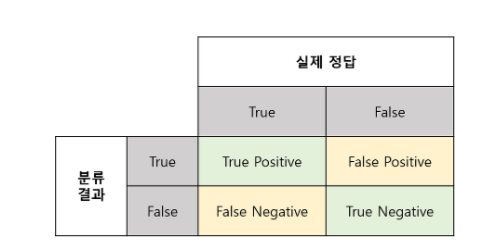
            <출처 : https://sumniya.tistory.com/26 >

In [106]:
#cross_validation_socre
from sklearn.model_selection import cross_val_score
crossval_scores = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=10)

print("coree-validation mean : %.3f" %(crossval_scores.mean()))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\u

coree-validation mean : 0.803


In [102]:
from sklearn.model_selection import cross_validate

cross_validate(log, X, y, scoring=["accuracy", "precision", "f1","recall"])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda3\lib\site-packages\sklearn\u

{'fit_time': array([0.19348264, 0.18251204, 0.22440052, 0.21442771, 0.19547486]),
 'score_time': array([0.03889704, 0.03989458, 0.05684733, 0.06682134, 0.04986715]),
 'test_accuracy': array([0.71037005, 0.71858819, 0.72384798, 0.71904988, 0.71572447]),
 'test_precision': array([0.66500224, 0.66906686, 0.67249963, 0.66891347, 0.66482759]),
 'test_f1': array([0.74535355, 0.75455751, 0.75962453, 0.755357  , 0.75374486]),
 'test_recall': array([0.84779097, 0.86509595, 0.87268409, 0.86745843, 0.87011876])}

In [113]:
cm = confusion_matrix(y_test,y_pred)

print("accuracy :", accuracy_score(y_test, y_pred).round(3))
print("recall :", sklearn.metrics.recall_score(y_test, y_pred).round(3))
print("fall-out: ",(cm[1][0]/(cm[1][0]+cm[1][1])).round(3))
print("f1_score : ", sklearn.metrics.f1_score(y_test, y_pred).round(3))

print("roc_auc  :", roc_auc_score(y_test,  probability).round(3))

accuracy : 0.718
recall : 0.863
fall-out:  0.137
f1_score :  0.754
roc_auc  : 0.801


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


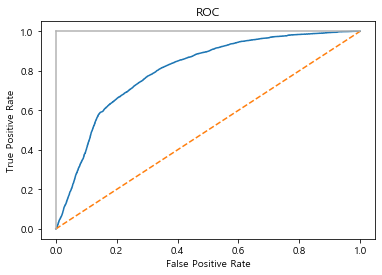

0.8014715452155763

In [104]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

log.fit(X_train, y_train)

# 예측 확률 계산
probability = log.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, probability)

# ROC 곡선 그리기 
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# roc 곡선 밑 계산 
roc_auc_score(y_test, probability)

### 2. Decision Tree,Random Forest

In [23]:
from sklearn.tree import DecisionTreeClassifier 

decisiontree = DecisionTreeClassifier(random_state=2020)
model = decisiontree.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Decision Tree")
print(confusion)


훈련 세트 점수: 0.995
테스트 세트 점수: 0.914
Decision Tree
[[11786  1370]
 [  901 12256]]


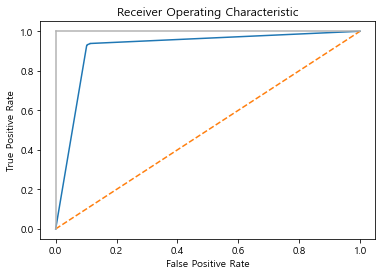

0.9171714844137526

In [24]:
# ROC 곡선 그려보기 
# 이진 분류기의 품질을 평가하는데 널리 사용함 
# 확률 임곗값(어떤 샘플을 한 클래스로 예측할 확률)마다 
# 진짜 양성과 거짓 양성 개수를 비교 
# 좋은 모델일 수록 실선에 가까움 

import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

model.fit(X_train, y_train)

# 예측 확률 계산
target_probabilities = model.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, 
                                                               target_probabilities)

# ROC 곡선 그리기 
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# roc 곡선 밑 계산 
roc_auc_score(y_test, target_probabilities)

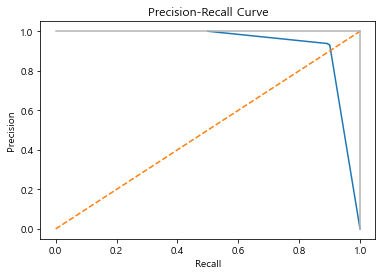

0.8762544950616876

In [25]:
# precision_recall_curve 함수를 사용하여 
# 임계접 마다 정밀도와 재현율을 계산하여 
# 정밀도-재현율 곡선 그리기 

from sklearn.metrics import precision_recall_curve 

# 예측 확률 계산
target_probabilities = model.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
precision, recall, threshold = precision_recall_curve(
    y_test, target_probabilities)

# ROC 곡선 그리기 
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0,1], ls="--")
plt.plot([1,1], c=".7"), plt.plot([1,1],[1,0], c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

# 정밀도 - 재현율 곡선에서는 오른쪽 맨위에 가까울수록 좋은 모델
# 평균 정밀도 계산

from sklearn.metrics import average_precision_score 

# 평균 정밀도를 계산 
average_precision_score(y_test, target_probabilities)

In [100]:
# 이미지 추출하는 것. -> 만지면 시간 오래 걸림 

# import pydotplus
# from IPython.display import Image
# from sklearn import tree 

# decisiontree = DecisionTreeClassifier(random_state=2020)
# model = decisiontree.fit(X_train, y_train)

# dot_data = tree.export_graphviz(decisiontree, out_file=None, feature_names=X.columns,
#                                class_names=y.columns[0])

# graph = pydotplus.graph_from_dot_data(dot_data)

# Image(graph.create_png())

# graph.write_pdf("hahah.pdf")

In [26]:
# 랜덤 포레스트 

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = randomforest.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest")
print(confusion)


C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


훈련 세트 점수: 0.995
테스트 세트 점수: 0.942
RandomForest
[[12042  1114]
 [  410 12747]]


In [27]:
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)

model_entropy = randomforest_entropy.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(model_entropy.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model_entropy.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model_entropy.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest_entropy")
print(confusion)

C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


훈련 세트 점수: 0.995
테스트 세트 점수: 0.942
RandomForest_entropy
[[12023  1133]
 [  398 12759]]


C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


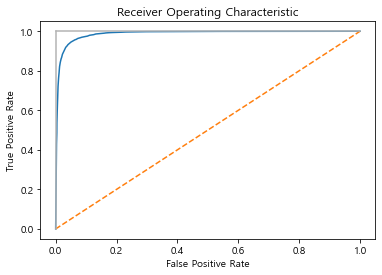

0.9872304124524798

In [28]:
# ROC 곡선 그려보기 
# 이진 분류기의 품질을 평가하는데 널리 사용함 
# 확률 임곗값(어떤 샘플을 한 클래스로 예측할 확률)마다 
# 진짜 양성과 거짓 양성 개수를 비교 
# 좋은 모델일 수록 실선에 가까움 

import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

model_entropy.fit(X_train, y_train)

# 예측 확률 계산
target_probabilities = model_entropy.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, 
                                                               target_probabilities)

# ROC 곡선 그리기 
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# roc 곡선 밑 계산 
roc_auc_score(y_test, target_probabilities)

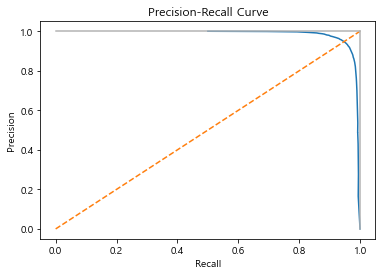

0.98435346267609

In [29]:
# precision_recall_curve 함수를 사용하여 
# 임계접 마다 정밀도와 재현율을 계산하여 
# 정밀도-재현율 곡선 그리기 

from sklearn.metrics import precision_recall_curve 

# 예측 확률 계산
target_probabilities = model_entropy.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
precision, recall, threshold = precision_recall_curve(
    y_test, target_probabilities)

# ROC 곡선 그리기 
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0,1], ls="--")
plt.plot([1,1], c=".7"), plt.plot([1,1],[1,0], c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

# 정밀도 - 재현율 곡선에서는 오른쪽 맨위에 가까울수록 좋은 모델
# 평균 정밀도 계산

from sklearn.metrics import average_precision_score 

# 평균 정밀도를 계산 
average_precision_score(y_test, target_probabilities)

In [ ]:
# 랜덤 포레스트 그리드 탐색

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [0,10,100,10^10], 'max_depth' : [8,80,8000,80000],
    'bootstrap':[False], 'n_estimators': [10,1000,10000], 'min_samples_split': [3],
    'criterion' : ["gini"],'class_weight' : ["balanced_subsample"]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Users\a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

In [118]:
# 정한 범위에서 그리드 탐색 결과 
# 범위 변경해줘도 상관없음 

grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=8, min_samples_split=3, n_estimators=10)

In [122]:
# 하지만 결과가 그리 좋지는 앟음 -> 차라리 그냥 돌리는게 나을정도로
# 다만 오버피팅을 막을 방법이 필요함 

randomforest_entropy = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=8, min_samples_split=3, n_estimators=10)


model_entropy = randomforest_entropy.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(model_entropy.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model_entropy.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model_entropy.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest_entropy")
print(confusion)

C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


훈련 세트 점수: 0.994
테스트 세트 점수: 0.969
RandomForest_entropy
[[22690   720]
 [  750 22660]]


## XG BOOST

In [138]:
from xgboost import plot_importance
from xgboost import XGBClassifier

import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in y_train.columns.values]
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in y_test.columns.values]
# 이거 안하면 오류 남 -> 칼럼 특수문자때문에 

xgb = XGBClassifier(n_estimators=200, learning_rate= 0.5)
model = xgb.fit(X_train,y_train)

In [139]:
print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("XG BOOST")
print(confusion)


훈련 세트 점수: 0.883
테스트 세트 점수: 0.877
RandomForest
[[19939  3471]
 [ 2281 21129]]


In [140]:
# 점수가 생각보다 낮음 
# XG 부스트 일단 대충 돌려본건데
# 추후에 하이퍼파라미터 탐색할 예정 

## 0 값 군집화

In [159]:
# 새로운 데이터 프레임 합체 

X['목적값'] = y['목적값']
A = X[X['목적값'] == 0]

In [166]:
A

,주거용부동산 보유여부,월평균상환원금금액합계,평균부담대출이자율,월평균총신용카드이용금액,DTI,DSR,저축은행업종대출총잔액(미해지)_기업여신_,할부금융업종대출총기관수(미해지)_기업여신_,목적값
0,-0.660448,-0.229908,0.025472,-0.168428,0.058450,-0.146463,-0.104534,-0.336439,0
1,-0.660448,-0.229908,-0.512799,-0.305549,-0.569555,-0.662505,-0.104534,-0.336439,0
2,-0.660448,2.510671,-0.303626,-0.054718,-0.374676,-0.502369,-0.104534,-0.336439,0
3,1.514123,0.308346,-0.332911,-0.128295,0.003841,0.311948,-0.104534,-0.336439,0
4,-0.660448,-0.229908,-0.153022,-0.151706,-0.179796,-0.175939,2.613679,2.360806,0
...,...,...,...,...,...,...,...,...,...
95764,1.514123,1.261591,0.277873,-0.048029,0.143576,-0.012723,-0.104534,-0.336439,0
95765,1.514123,-0.123079,-0.278526,-0.196855,-0.368251,-0.483452,-0.104534,-0.336439,0
95766,1.514123,-0.229908,0.047784,0.130898,-0.569020,-0.462775,-0.104534,-0.336439,0
95767,-0.660448,-0.229908,-0.249242,0.003810,-0.569555,-0.662505,-0.104534,-0.336439,0


In [164]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns 

model = KMeans(n_clusters=6, algorithm='auto')
model.fit(A)
B = pd.DataFrame(model.predict(A))
B.columns = ['군집']

# B 군집 생성 

In [167]:
A['군집'] = B['군집']

C:\Users\a\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
A

,주거용부동산 보유여부,월평균상환원금금액합계,평균부담대출이자율,월평균총신용카드이용금액,DTI,DSR,저축은행업종대출총잔액(미해지)_기업여신_,할부금융업종대출총기관수(미해지)_기업여신_,목적값,군집
0,-0.660448,-0.229908,0.025472,-0.168428,0.058450,-0.146463,-0.104534,-0.336439,0,1.0
1,-0.660448,-0.229908,-0.512799,-0.305549,-0.569555,-0.662505,-0.104534,-0.336439,0,1.0
2,-0.660448,2.510671,-0.303626,-0.054718,-0.374676,-0.502369,-0.104534,-0.336439,0,1.0
3,1.514123,0.308346,-0.332911,-0.128295,0.003841,0.311948,-0.104534,-0.336439,0,3.0
4,-0.660448,-0.229908,-0.153022,-0.151706,-0.179796,-0.175939,2.613679,2.360806,0,1.0
...,...,...,...,...,...,...,...,...,...,...
95764,1.514123,1.261591,0.277873,-0.048029,0.143576,-0.012723,-0.104534,-0.336439,0,NaN
95765,1.514123,-0.123079,-0.278526,-0.196855,-0.368251,-0.483452,-0.104534,-0.336439,0,NaN
95766,1.514123,-0.229908,0.047784,0.130898,-0.569020,-0.462775,-0.104534,-0.336439,0,NaN
95767,-0.660448,-0.229908,-0.249242,0.003810,-0.569555,-0.662505,-0.104534,-0.336439,0,NaN


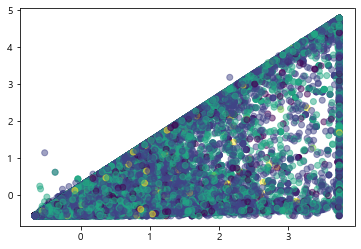

In [181]:
plt.scatter(A['DSR'],A['DTI'],c=A['군집'], alpha=0.5)
# x , y 값 지정하면서 보기 